In [1]:
#Jagoda Lewicka 219951 Applied Mathematics


## Task 1

Simulate a random walk of an agent on a square lattice. The program
should take a snapshot of the lattice in every time step and save it to a
jpg or png file. These files should then be used to generate a movie (avi
or animated gif).

In [183]:
from matplotlib import pyplot as plt
import numpy as np
import random as rn
import imageio
import seaborn as sns
import networkx as nx

In [185]:
def random_walk(n, a, gif):
    """Function simulates a random walk of an agent on a square lattice. Takes a snapshot of the lattice in every 
    time step and saves it to a png file. These files are used to generate an animated gif. 
    Also displays final plot of random walk.
  
    Parameters 
    ----------
    n : int
        Number of steps
    a : int
        Length of square side
    gif: bool
        If gif is True, the function creates an animated gif
  
    """

  
    # creating two array for containing x and y coordinate 
    x = np.zeros(n+1) 
    y = np.zeros(n+1) 
    
    images = [] # list for snapshots
    
    # filling the coordinates with random variables 
    for i in range(1, n+1): 
        if x[i-1] == a-1 and y[i-1] == a-1: # while an agent is close to upper right corner
            val = rn.randint(1, 2) # now an agent can go only in two directions
            if val == 2: 
                x[i] = x[i - 1] - 1
                y[i] = y[i - 1] 
            else: 
                x[i] = x[i - 1] 
                y[i] = y[i - 1] - 1
                
        elif x[i-1] == a-1 and y[i-1] == -a+1: # while an agent is close to lower right corner
            val = rn.randint(1, 2) 
            if val == 2: 
                x[i] = x[i - 1] - 1
                y[i] = y[i - 1] 
            else: 
                x[i] = x[i - 1] 
                y[i] = y[i - 1] + 1
                
        elif x[i-1] == -a+1 and y[i-1] == a-1: # while an agent is close to lower left corner
            val = rn.randint(1, 2) 
            if val == 2: 
                x[i] = x[i - 1] + 1
                y[i] = y[i - 1] 
            else: 
                x[i] = x[i - 1] 
                y[i] = y[i - 1] - 1
                
        elif x[i-1] == -a+1 and y[i-1] == -a+1: # while an agent is close to upper left corner
            val = rn.randint(1, 2) 
            if val == 2: 
                x[i] = x[i - 1] + 1
                y[i] = y[i - 1] 
            else: 
                x[i] = x[i - 1] 
                y[i] = y[i - 1] + 1
                
        elif x[i-1] == a-1: # while an agent is close to right side
            val = rn.randint(1, 3) # now an agent can go in three directions
            if val == 2: 
                x[i] = x[i - 1] - 1
                y[i] = y[i - 1] 
            elif val == 3: 
                x[i] = x[i - 1] 
                y[i] = y[i - 1] + 1
            else: 
                x[i] = x[i - 1] 
                y[i] = y[i - 1] - 1
                
        elif x[i-1] == -a+1:
            val = rn.randint(1, 3) 
            if val == 1: 
                x[i] = x[i - 1] + 1
                y[i] = y[i - 1] 
            elif val == 3: 
                x[i] = x[i - 1] 
                y[i] = y[i - 1] + 1
            else: 
                x[i] = x[i - 1] 
                y[i] = y[i - 1] - 1
                
        elif y[i-1] == a-1:
            val = rn.randint(1, 3) 
            if val == 1: 
                x[i] = x[i - 1] + 1
                y[i] = y[i - 1] 
            elif val == 2: 
                x[i] = x[i - 1] - 1
                y[i] = y[i - 1] 
            else: 
                x[i] = x[i - 1] 
                y[i] = y[i - 1] - 1
                
        elif y[i-1] == -a+1:
            val = rn.randint(1, 3) 
            if val == 1: 
                x[i] = x[i - 1] + 1
                y[i] = y[i - 1] 
            elif val == 2: 
                x[i] = x[i - 1] - 1
                y[i] = y[i - 1] 
            elif val == 3: 
                x[i] = x[i - 1] 
                y[i] = y[i - 1] + 1
        
        else:
            val = rn.randint(1, 4) # an agent can go in four directions
            if val == 1: 
                x[i] = x[i - 1] + 1
                y[i] = y[i - 1] 
            elif val == 2: 
                x[i] = x[i - 1] - 1
                y[i] = y[i - 1] 
            elif val == 3: 
                x[i] = x[i - 1] 
                y[i] = y[i - 1] + 1
            else: 
                x[i] = x[i - 1] 
                y[i] = y[i - 1] - 1
    
    if gif == True:
        for k in range(1, n+1):
            fig = plt.figure()
            ax = fig.gca()
            #ax.set_xticks(np.arange(-a, a, 1))
            #ax.set_yticks(np.arange(-a, a, 1))
            plt.axis([-a , a, -a, a])
            #plt.grid()
            plt.title("Random Walk ($n = " + str(k) + "$ steps)") 
            plt.plot(x[:k], y[:k], 'c')
            plt.plot(x[:k], y[:k], 'cx') 
            plt.plot(x[k-1], y[k-1], 'rx') 
            plt.savefig("rand_walk"+str(k)+".jpg") 
            images.append(imageio.imread("rand_walk"+str(k)+".jpg"))
            plt.close(fig)
        
        imageio.mimsave('rand_walk.gif',images, fps = 2)
        
    # plotting stuff:    
    fig = plt.figure()
    ax = fig.gca()
    ax.set_xticks(np.arange(-a, a, 1))
    ax.set_yticks(np.arange(-a, a, 1))
    plt.axis([-a , a, -a, a])
    plt.grid()
    plt.title("Random Walk ($n = " + str(n) + "$ steps)") 
    plt.plot(x, y, 'b')
    plt.plot(x, y, 'rx')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

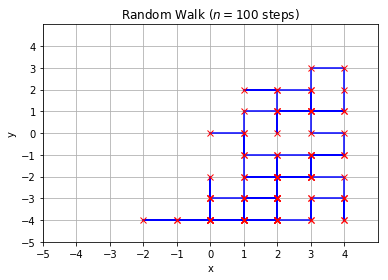

In [186]:
random_walk(100, 5, False)

## Task 2

In [187]:
def point(q):
    """ Function generates point from given quarter q from circle with radius equal to 1. """ 
    
    if q == 1:
        x = rn.uniform(0, 1)
        y = np.sqrt(1 - x**2)
        
    elif q == 2:
        x = rn.uniform(-1, 0)
        y = np.sqrt(1 - x**2)
        
    elif q == 3:
        x = rn.uniform(-1, 0)
        y = - np.sqrt(1 - x**2)
        
    elif q == 4:
        x = rn.uniform(0, 1)
        y = - np.sqrt(1 - x**2)
    
    elif q == 12:
        x = rn.uniform(-1 ,1)
        y = np.sqrt(1 - x**2)
        
    elif q == 34:
        x = rn.uniform(-1 ,1)
        y = - np.sqrt(1 - x**2)
        
    elif q == 14:
        x = rn.uniform(0 ,1)
        p = rn.random()
        if p >= 1/2:
            y = np.sqrt(1 - x**2)
        if p < 1/2:
            y = - np.sqrt(1 - x**2) 
            
    elif q == 23:
        x = rn.uniform(-1 ,0)
        p = rn.random()
        if p >= 1/2:
            y = np.sqrt(1 - x**2)
        if p < 1/2:
            y = - np.sqrt(1 - x**2) 

    elif q == 1234:
        x = rn.uniform(-1, 1)
        p = rn.random()
        if p >= 1/2:
            y = np.sqrt(1 - x**2)
        if p < 1/2:
            y = - np.sqrt(1 - x**2)    
            
    return x, y

In [188]:
def random_walk2(n, l):
    """Function simulates Pearson’s random walk in the plane,
    where the steps have constant length a = 1 and uniformly distributed
    random angles. 
  
    Parameters 
    ----------
    n : int
        Number of steps
    l : int
        Length of square side
  
    Returns 
    -------
    x : array
        List of x coordinates of steps
    y : array
        List of y coordinates of steps
    l : int
        Length of square side
    """

  
    #creating two array for containing x and y coordinate 
    #of size equals to the number of size and filled up with 0's 
    x = np.zeros(n+1) 
    y = np.zeros(n+1) 

    # filling the coordinates with random variables 
    for i in range(1, n+1): 
        if x[i-1] >= l-1 and y[i-1] >= l-1:
            a, b = point(3)
            x[i] = x[i - 1] + a
            y[i] = y[i - 1] + b
                
        elif x[i-1] >= l-1 and y[i-1] <= -l+1:
            a, b = point(2)
            x[i] = x[i - 1] + a
            y[i] = y[i - 1] + b
                
        elif x[i-1] <= -l+1 and y[i-1] >= l-1:
            a, b = point(4)
            x[i] = x[i - 1] + a
            y[i] = y[i - 1] + b
                
        elif x[i-1] <= -l+1 and y[i-1] <= -l+1:
            a, b = point(1)
            x[i] = x[i - 1] + a
            y[i] = y[i - 1] + b
                
        elif x[i-1] >= l-1:
            a, b = point(23)
            x[i] = x[i - 1] + a
            y[i] = y[i - 1] + b
                
        elif x[i-1] <= -l+1:
            a, b = point(14)
            x[i] = x[i - 1] + a
            y[i] = y[i - 1] + b
                
        elif y[i-1] >= l-1:
            a, b = point(34)
            x[i] = x[i - 1] + a
            y[i] = y[i - 1] + b
                
        elif y[i-1] <= -l+1:
            a, b = point(12)
            x[i] = x[i - 1] + a
            y[i] = y[i - 1] + b
        
        else:
            a, b = point(1234)
            x[i] = x[i - 1] + a
            y[i] = y[i - 1] + b
    
    return x, y, l

In [189]:
X, Y, a = random_walk2(1000, 8)

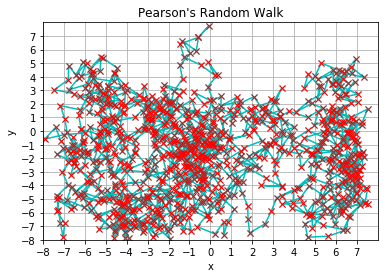

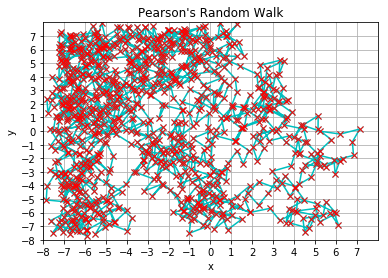

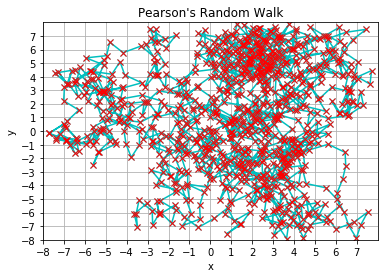

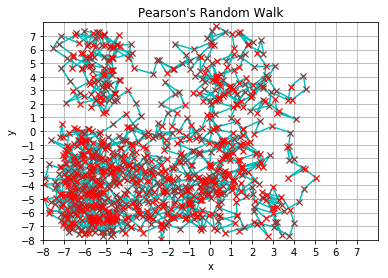

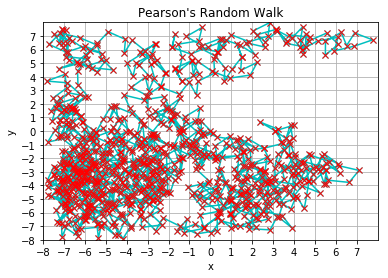

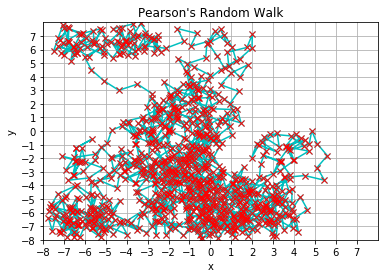

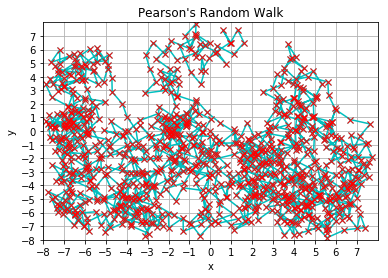

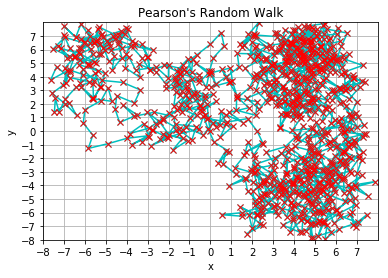

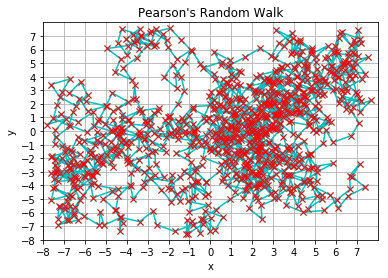

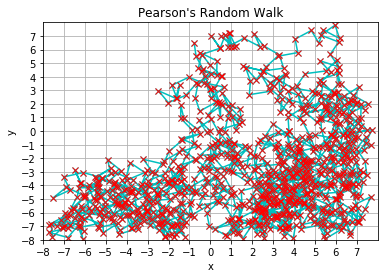

In [8]:
# plotting several trajectories
for i in range(10):
    X, Y, a = random_walk2(1000, 8)
    fig = plt.figure()
    ax = fig.gca()
    ax.set_xticks(np.arange(-a, a, 1))
    ax.set_yticks(np.arange(-a, a, 1))
    plt.axis([-a , a, -a, a])
    plt.grid()
    plt.title("Pearson's Random Walk") 
    plt.plot(X, Y, 'c')
    plt.plot(X, Y, 'cx') 
    plt.plot(X, Y, 'rx')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [190]:
# monte carlo

# list of fractions of time steps when the walker is in right half plane
A_list = []
# list of fractions of time the walker is in the first quadrant
B_list = []

for k in range(1000):
    X, Y, a = random_walk2(1000, 8)
    
    A = [i for i in X if i>0]
    A_list.append(len(A)/len(X))
    
    B = 0
    for x, y in zip(X,Y):
        if x>0 and y>0:
            B = B + 1
    B_list.append(B/len(X))

In [191]:
# checking expected values
np.mean(A_list), np.mean(B_list)

(0.49475924075924077, 0.24989610389610392)

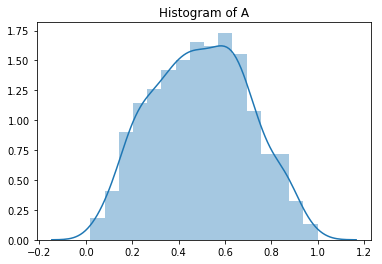

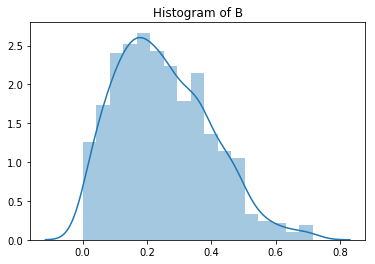

In [192]:
plt.figure()
plt.title("Histogram of A") 
sns.distplot(A_list, hist=True)

plt.figure()
plt.title("Histogram of B") 
sns.distplot(B_list, hist=True)
plt.show()

In [193]:
def save_to_gif(x, y, a):
    """ Function generates an animated gif for random walk (on fixed square with side a) 
    represented by given x, y coordinate. """
    
    n = len(x)
    images = []
    for k in range(1, n+1):
        fig = plt.figure()
        ax = fig.gca()
        ax.set_xticks(np.arange(-a, a, 1))
        ax.set_yticks(np.arange(-a, a, 1))
        plt.axis([-a , a, -a, a])
        plt.grid()
        plt.title("Pearson's Random Walk ($n = " + str(k) + "$ steps)") 
        plt.plot(x[:k], y[:k], 'c')
        plt.plot(x[:k], y[:k], 'cx') 
        plt.plot(x[k-1], y[k-1], 'rx') 
        plt.xlabel('x')
        plt.ylabel('y')
        plt.savefig("rand_walk"+str(k)+".jpg") 
        images.append(imageio.imread("rand_walk"+str(k)+".jpg"))
        plt.close(fig)
        
    imageio.mimsave('pearson_random_walk.gif',images, fps = 3)

In [194]:
X, Y, a = random_walk2(50, 8)
save_to_gif(X, Y, a)

## Problem 3

In [203]:
def random_walk3(n, G, gif, origin):
    """Function simulates random walk on a given graph and saves it to animated fig.
  
    Parameters 
    ----------
    n : int
        Number of steps
    G : gaph
        Graph on which random walk will occure
    gif : bool
        If gif is True, the function creates an animated gif
    origin: int
        Origin node
  
    Returns 
    -------
    path : list
        List of nodes path 
    nodes : list
        List of nodes in graph
    """
    
    images = []
    
    x = np.zeros(n+1) 
    x[0] = origin
    
    if len(list(G.neighbors(origin))) == 0:
        print('Origin node has no neighbors')
        return 0, 0
        
    for i in range(1, n + 1): 
        node = rn.choice(list(G.neighbors(x[i - 1])))
        x[i] = node 
        
        if gif == True:
            color_map_nodes = []
            
            for n in G:
                if n == x[i]:
                    color_map_nodes.append('red')
                    
                else: 
                    color_map_nodes.append('blue')  
                    
            fig = plt.figure()
            plt.title("Graph Random Walk") 
            nx.draw_circular(G, node_color=color_map_nodes, with_labels=True)
            plt.savefig("graph_rand_walk"+str(i)+".jpg") 
            images.append(imageio.imread("graph_rand_walk"+str(i)+".jpg"))
            plt.close(fig)
    
    if gif == True:
        imageio.mimsave('graph_random_walk.gif', images, fps = 1)
        
    path = list(x)
    nodes = list(G.nodes()) 
    
    return path, nodes

In [204]:
# test
path, nodes = random_walk3(20, nx.erdos_renyi_graph(10, 1/2, seed=None, directed=False), False, 0)

In [224]:
def monte_carlo(G):
    """Function estimates average hitting times of all nodes."""
    
    dictionary = {} # we will create dictionary with node and it's hitting time from origin node
    
    for i in range(1000):
        path, nodes = random_walk3(100, G, False, 0)
        
        if path != 0: # we reject graphs when it's origin node does not have any neigbours
            for k in nodes:
                if k in dictionary.keys():
                    if k in path:
                        dictionary[k].append(path.index(k))
                    
                    else:
                        continue 
                    
                else:
                    if k in path:
                        dictionary[k] = [path.index(k)]
                    
                    else:
                        continue
        else:
            continue
                    
    mean_dictionary = {} # dictionary with node and it's average hitting time from origin node
    
    for key in dictionary.keys():
        mean_dictionary[key] = [round(np.mean(dictionary[key]), 2)]
        
    return mean_dictionary

In [228]:
monte_carlo(nx.erdos_renyi_graph(10, 1/2, seed=None, directed=False))

{0: [0.0],
 1: [10.27],
 2: [8.92],
 3: [10.51],
 4: [17.56],
 5: [10.04],
 6: [8.11],
 7: [8.76],
 8: [5.96],
 9: [10.2]}

In [220]:
path, nodes = random_walk3(20, nx.barabasi_albert_graph(20, 3, seed=None), True, 0)

In [221]:
path, nodes = random_walk3(20, nx.watts_strogatz_graph(15, 2, 1/3, seed=None), True, 0)

In [245]:
monte_carlo(nx.barabasi_albert_graph(20, 3, seed=None))

{0: [0.0],
 1: [23.18],
 2: [18.32],
 3: [8.6],
 4: [13.25],
 5: [19.35],
 6: [27.57],
 7: [20.63],
 8: [9.88],
 9: [22.8],
 10: [28.53],
 11: [27.04],
 12: [29.46],
 13: [22.83],
 14: [26.9],
 15: [27.83],
 16: [31.88],
 17: [33.92],
 18: [32.5],
 19: [28.26]}

In [247]:
monte_carlo(nx.watts_strogatz_graph(15, 2, 1/3, seed=None))

{0: [0.0],
 1: [9.86],
 2: [10.02],
 3: [39.38],
 4: [32.46],
 5: [47.67],
 6: [44.0],
 7: [38.82],
 8: [19.92],
 9: [54.8],
 10: [51.25],
 11: [41.73],
 12: [29.92],
 13: [18.34],
 14: [8.86]}

In [249]:
monte_carlo(nx.watts_strogatz_graph(50, 2, 1/2, seed=None))

{0: [0.0],
 1: [1.0],
 2: [4.21],
 3: [25.63],
 4: [32.87],
 5: [38.65],
 6: [38.82],
 7: [37.15],
 13: [49.32],
 14: [46.13],
 15: [40.88],
 16: [26.55],
 17: [55.44],
 18: [65.49],
 19: [63.99],
 20: [63.7],
 21: [61.42],
 22: [58.89],
 23: [40.55],
 24: [39.88],
 25: [34.95],
 26: [31.9],
 27: [24.52],
 28: [60.82],
 29: [56.77],
 32: [53.8],
 33: [51.43],
 34: [51.43],
 35: [44.1],
 36: [38.23],
 37: [36.99],
 38: [32.84],
 39: [25.83],
 40: [53.25],
 41: [49.08],
 42: [46.47],
 43: [41.24],
 45: [54.05],
 46: [55.45],
 47: [52.59],
 48: [53.21],
 49: [46.81]}